## Multiple Linear Regression

### (1) Data Exploration

In [2]:
# Load the California dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Data (Independent Variables):\n", housing.data[:5]) # Identify the first 5 rows of numpy array
print("Data Shape of Independent Variables:", housing.data.shape) # The number of rows and columns
print("\nTarget (Dependent Variables):\n", housing.target[:5])
print("Target Shape:", housing.target.shape)
print("\nHousing Datat Feature Names:", housing.feature_names)
print("\nDataset Description:\n", housing.DESCR)

Data (Independent Variables):
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
Data Shape of Independent Variables: (20640, 8)

Target (Dependent Variables):
 [4.526 3.585 3.521 3.413 3.422]
Target Shape: (20640,)

Housing Datat Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Dataset Description:
 .. _california_h

In [4]:
# Tranform Numpy Arrays into a Pandas DataFrame
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['MEDV'] = housing.target / 100 # Include a dependent variable into the DataFrame 'df' and convert the unit of $100,000 into $1,000 for an overall easier read going forward.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.04526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.03585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.03521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.03413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.03422


In [5]:
df.tail() # Taking a look at the last 5 rows for additional information.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.00781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.00771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.00923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.00847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.00894


In [6]:
df.info()
# There are 20640 instances for all columns without null values.
# There are 8 independent variables describing a depenent variables 'MEDV' (Median Housing Value in $1,000)
# All variables are numeric (floats).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe() # Observing the dataset.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,0.020686
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,0.011540
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.001500
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,0.011960
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,0.017970
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,0.026472
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,0.050000


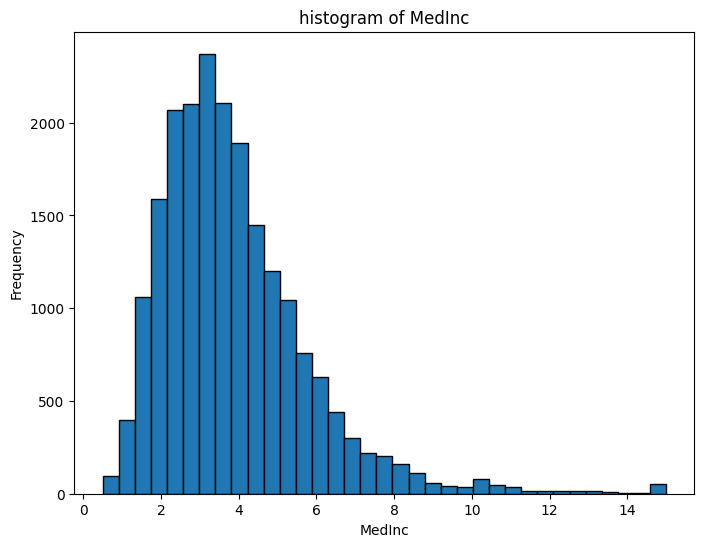

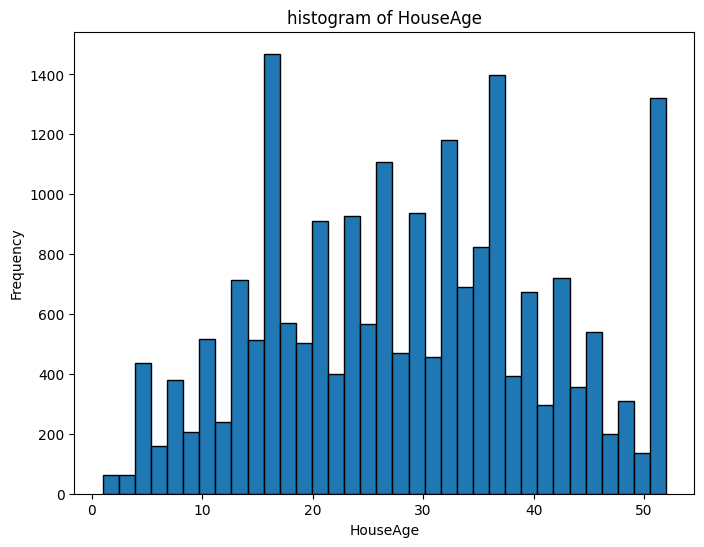

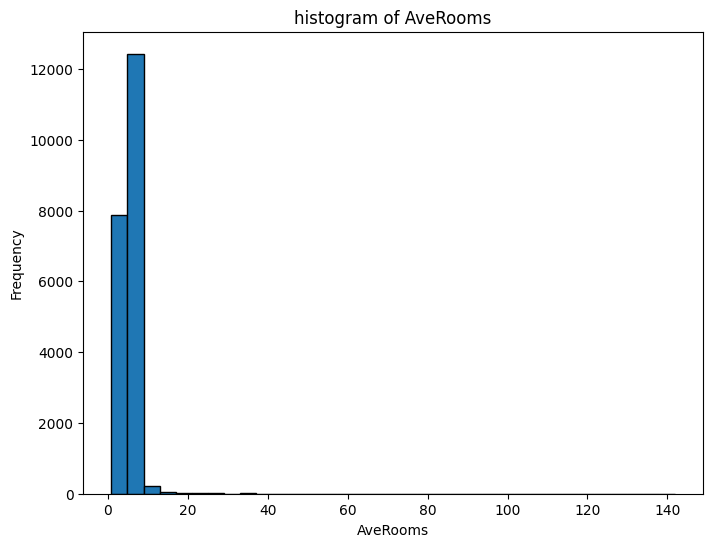

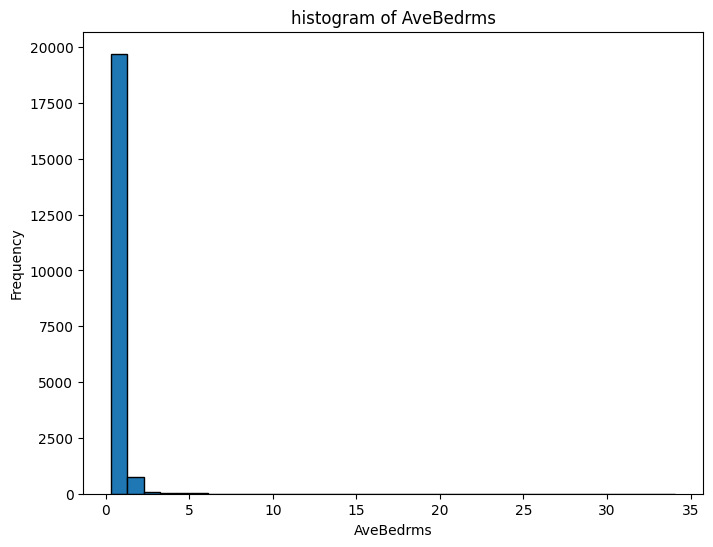

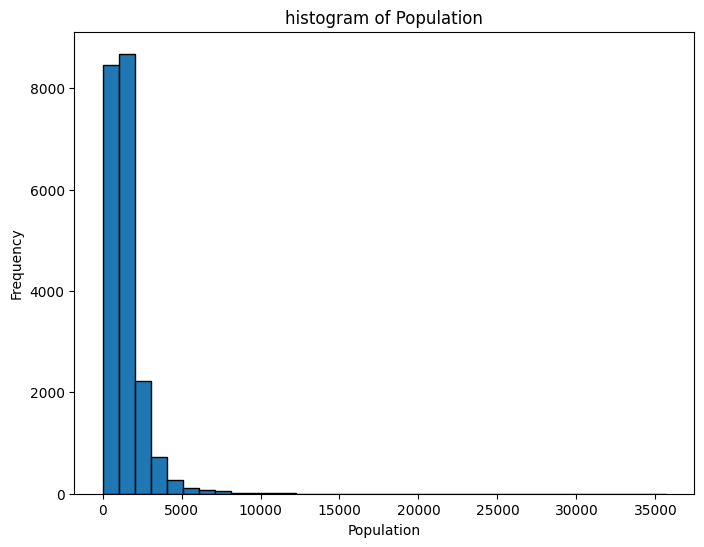

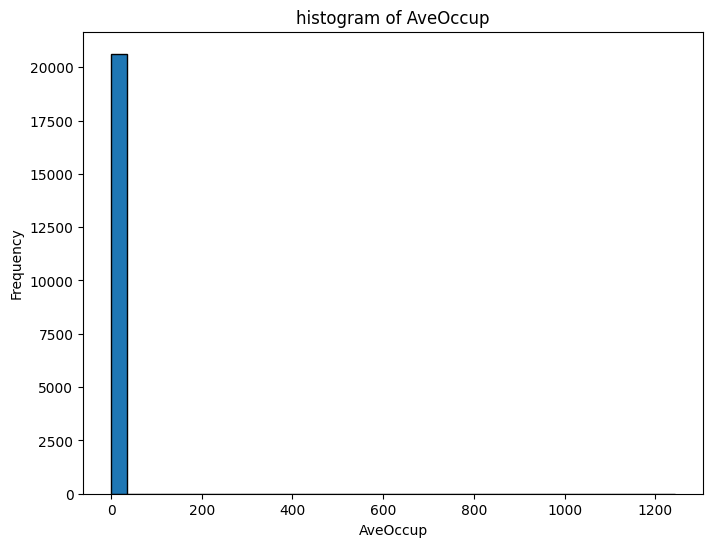

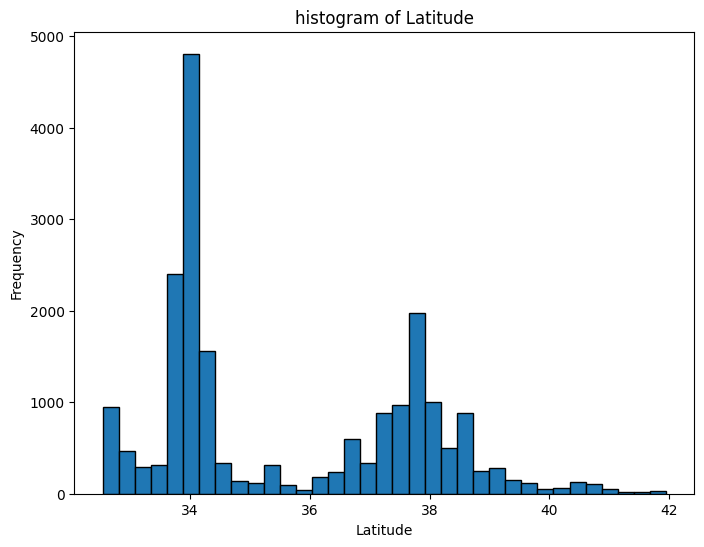

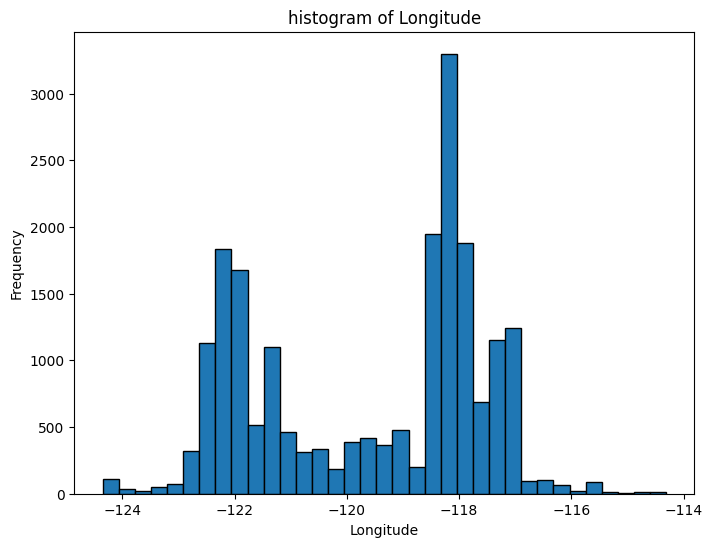

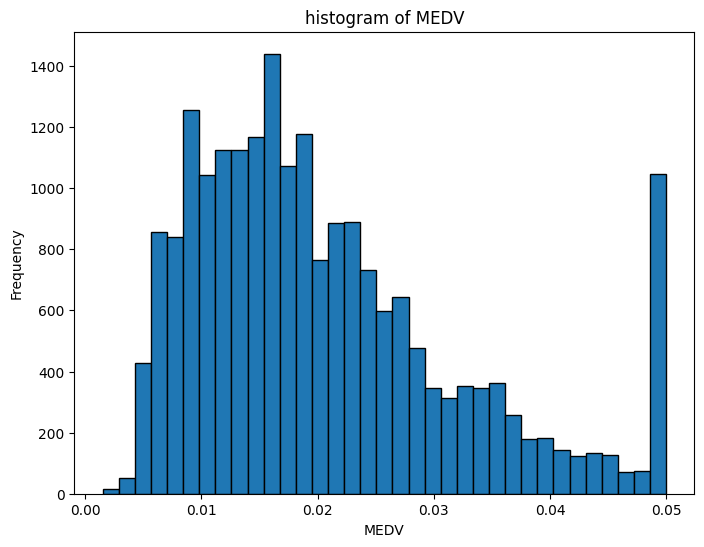

In [8]:
for col in df.columns:
  plt.figure(figsize = (8,6))
  plt.hist(df[col], bins = 35, edgecolor = 'black')
  plt.title(f'histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()
  # Attributes for columns

  # Many variables are skewed making it hard for a machine learning algorithm to predict accurately.
  # 1. MedInc is medium income in block group which is right skewed. This variable is scaled and capped limiting values within a specific range making it hard to predict beyond the range.
  # 2. The median housing age and housing value are also capped. For example, the maximum of the housing age within California districts is 52 years, making it hard for a machine learning algorithm to predict the housing age beyond 52 years same as applied to the median of hosuing value.
  # 3. The average number of rooms, bedrooms and occupation as well as population are right skewed.


<Axes: xlabel='Longitude', ylabel='Latitude'>

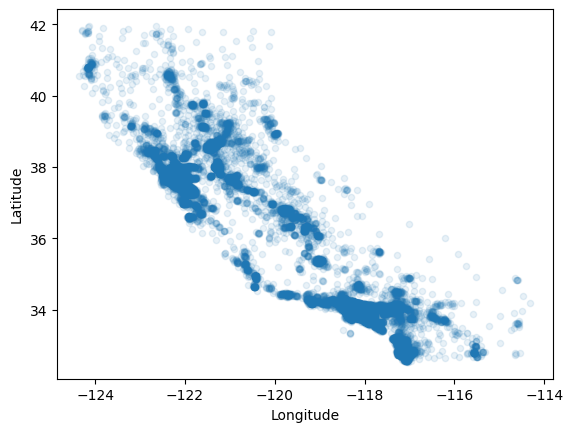

In [9]:
# Explore data by visualizing geographical variables such as latitude and longitude
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha = 0.1)
# There seems to be a high population density around cities located along the coastlines and the central locations.

<ipython-input-10-04863115ad79>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


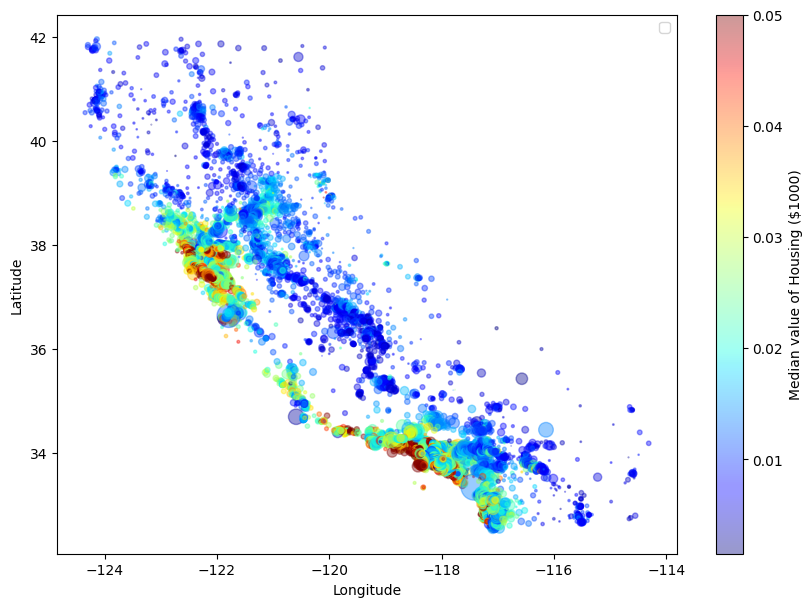

In [10]:
scatter = df.plot(kind='scatter', x='Longitude', y='Latitude', alpha = 0.4,
        s=df['Population']/100,
        c='MEDV',
        cmap=plt.get_cmap("jet"),
        colorbar=False, figsize=(10,7))
plt.colorbar(scatter.collections[0], label = 'Median value of Housing ($1000)')
plt.legend()
# According to the plot, high prices are related to the housing locations and the population density.
# The southern part of coastlines has higher housing prices whereas the housing prices of the northern part along the coastlines have a different pattern with lower housing prices.
# The populations are aggregated in the central locations but the housing prices are lower compared to the southern part of coastlines.


In [11]:
# Identify the correlations between numerical variables.
corr = df.corr()
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

<Axes: >

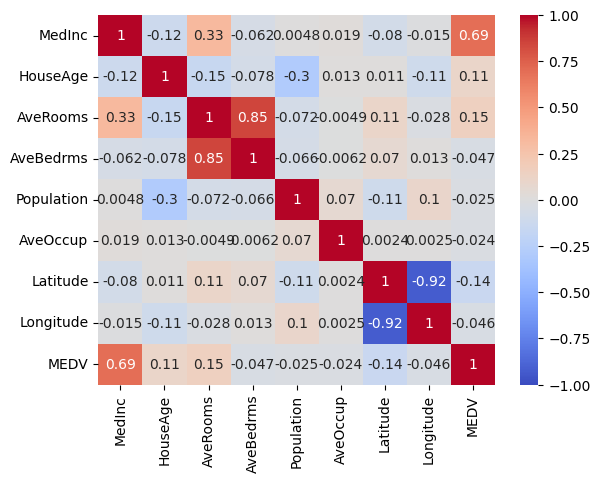

In [12]:
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
# There seems to be lower correlations between numerical variables.
# There seems to be a strong positive correlation between the median value of housing and the median income.

In [13]:
corr['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


<Axes: xlabel='MedInc', ylabel='MEDV'>

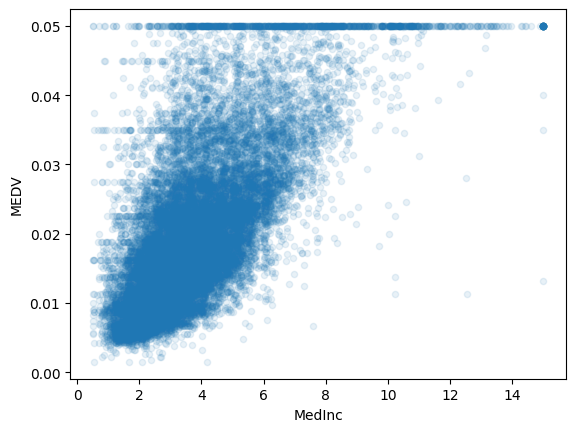

In [14]:
df.plot(kind='scatter', x='MedInc', y='MEDV', alpha=0.1)
# There seems to be a strong correlation between the two variables but values are capped.
# There is a horizontal line in the median value of housing around $500,000 which indicates a data-capped limit.
# There are some other horizontal lines shown around $450,000 $350,000 and $280,000 according to the plot, probably indicating outliers.

### (2) Data Preprocessing

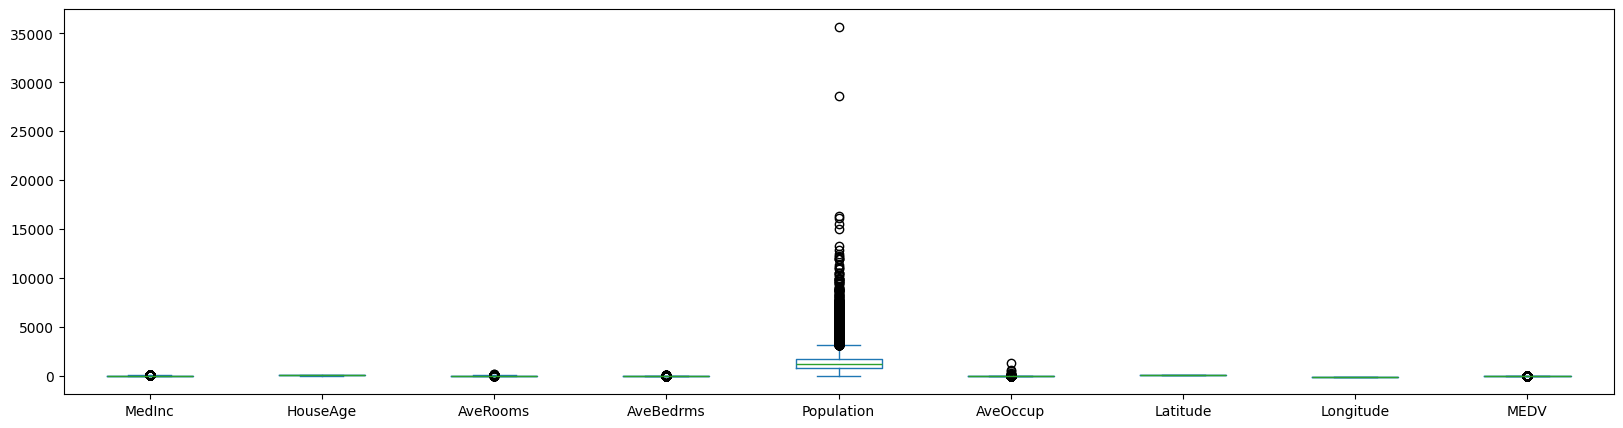

In [15]:
df.plot(kind='box', figsize=(20,5))
plt.show()

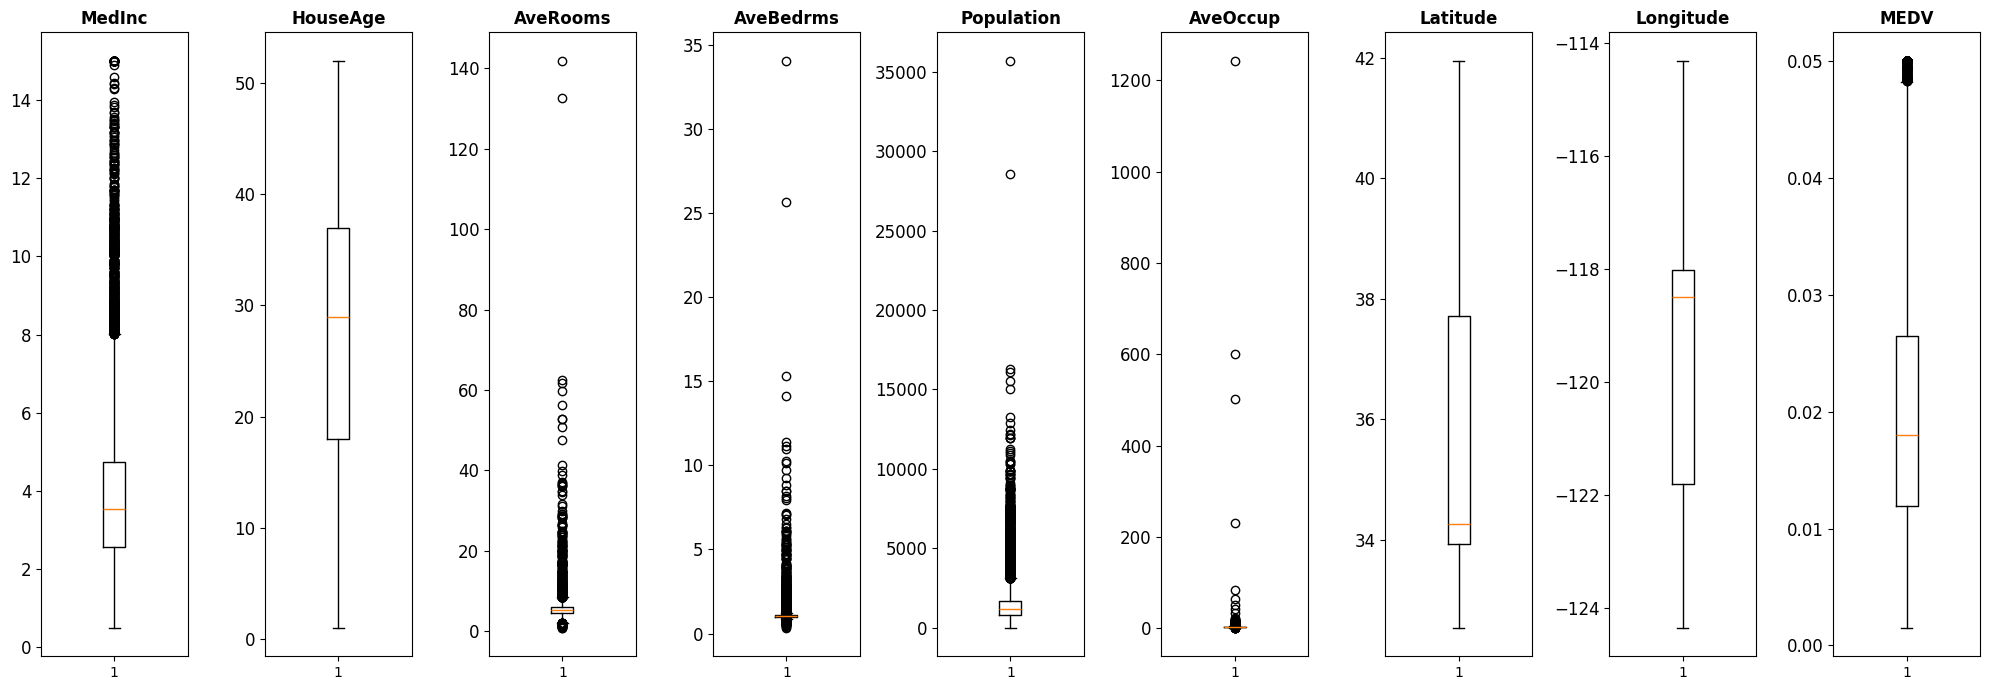

In [16]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,7))
for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i])
  ax.set_title(df.columns[i], fontsize=12, fontweight = 'bold')
  ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()

In [17]:
corr = corr[['AveRooms', 'AveBedrms']]
print(corr)

            AveRooms  AveBedrms
MedInc      0.326895  -0.062040
HouseAge   -0.153277  -0.077747
AveRooms    1.000000   0.847621
AveBedrms   0.847621   1.000000
Population -0.072213  -0.066197
AveOccup   -0.004852  -0.006181
Latitude    0.106389   0.069721
Longitude  -0.027540   0.013344
MEDV        0.151948  -0.046701


In [18]:
Q1 = np.percentile(df['AveRooms'], 25, method = 'midpoint')
Q3 = np.percentile(df['AveRooms'], 75, method = 'midpoint' )
IQR = Q3 - Q1

In [19]:
upper_bound = df['AveRooms'] > (Q3 + 1.5*IQR)
lower_bound = df['AveRooms'] < (Q1 - 1.5*IQR)
IQR, Q3, Q1

(1.6116969213354757, 6.052380952380952, 4.4406840310454765)

In [20]:
print(np.where(upper_bound))

(array([  155,   511,   512,   514,   517,   710,  1022,  1023,  1024,
        1025,  1030,  1102,  1233,  1234,  1235,  1236,  1237,  1238,
        1239,  1240,  1277,  1497,  1556,  1557,  1561,  1563,  1564,
        1566,  1582,  1617,  1636,  1645,  1646,  1663,  1867,  1871,
        1872,  1879,  1881,  1883,  1889,  1901,  1902,  1903,  1904,
        1905,  1906,  1907,  1908,  1910,  1911,  1912,  1913,  1914,
        1926,  1977,  1978,  1979,  2215,  2216,  2392,  2395,  2396,
        2397,  2398,  2510,  2511,  2763,  2768,  2769,  2776,  2778,
        2826,  3014,  3086,  3258,  3278,  3287,  3292,  3293,  3296,
        3313,  3328,  3329,  3338,  3341,  3349,  3350,  4014,  4018,
        4093,  4352,  4605,  4606,  4677,  4678,  5247,  5249,  5257,
        5259,  5260,  5281,  5291,  5538,  6226,  6391,  6399,  6590,
        6592,  6691,  6724,  6726,  6727,  6735,  6736,  8794,  8795,
        8805,  8847,  8848,  8849,  8850,  8851,  8852,  8853,  8854,
        8875,  9015

In [21]:
print(np.where(lower_bound))

(array([   73,  2779,  3126,  4263,  4281,  4424,  4550,  4552,  4553,
        4556,  4582,  4583,  4584,  4585,  4586,  4587,  4588,  4592,
        4597,  4601,  4602,  4609,  4612,  4636,  4638,  4639,  4663,
        4671,  4862,  4864,  5326,  5916,  7313,  8219,  9319, 12484,
       14325, 14332, 14818, 15654, 15660, 16186, 16534, 17164, 17820]),)


In [22]:
# According to the dataset description, due to vacation resorts, there can be large values in average rooms and average bathrooms when empty households are not counted for calculating the average.
# Remove upper_bound outliers to reduce negative impacts on the linear regression model.
# Normalization or Standardization can be applied for variables with nearly normally distributed but in this case, both variables are not normally distributed and instead they are skewed. Removing outliers can be better for increasing model accuracy.
AveRooms_outliers = np.where(upper_bound)
df.drop(AveRooms_outliers[0], inplace=True)

In [23]:
(df.shape)

(20174, 9)

### (3) Model Building

In [24]:
# Log_transformation for skewed data
df['MedInc_log'] = np.log1p(df['MedInc'])
df['AveRooms_log'] = np.log1p(df['AveRooms'])
df['AveBedrms_log'] = np.log1p(df['AveBedrms'])
df['Population_log'] = np.log1p(df['Population'])
df['AveOccup_log'] = np.log1p(df['AveOccup'])

In [25]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV', 'MedInc_log', 'AveRooms_log',
       'AveBedrms_log', 'Population_log', 'AveOccup_log'],
      dtype='object')

In [26]:
# Drop the dependent variable to aggregate the independent variables
X = df[['MedInc_log', 'AveRooms_log', 'AveBedrms_log', 'Population_log', 'AveOccup_log', 'Latitude', 'Longitude']]
y= df['MEDV']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [28]:
X_train

,MedInc_log,AveRooms_log,AveBedrms_log,Population_log,AveOccup_log,Latitude,Longitude
10685,1.873908,1.775704,0.698254,7.232010,1.211453,33.63,-117.73
8842,1.274916,1.453838,0.745833,7.495542,0.906075,34.09,-118.38
17267,1.747651,1.750876,0.688686,6.807935,1.303590,34.36,-119.70
5513,1.537684,1.802554,0.736385,6.450470,1.371063,33.99,-118.41
10712,1.642447,1.811092,0.738567,8.144969,1.160920,33.59,-117.70
...,...,...,...,...,...,...,...
16690,1.307630,1.725425,0.728239,6.714171,1.268608,35.12,-120.61
79,1.102405,1.688786,0.758693,5.843544,1.169181,37.80,-122.28
12397,1.357946,2.180640,0.948656,6.761573,1.345164,33.68,-116.30
14507,1.462700,1.612012,0.691212,7.373374,1.115648,32.89,-117.21


In [29]:
X_test

,MedInc_log,AveRooms_log,AveBedrms_log,Population_log,AveOccup_log,Latitude,Longitude
13372,1.730540,2.140965,0.772484,6.998510,1.469156,34.14,-117.51
15884,1.492275,1.699028,0.647968,7.757051,1.384372,37.73,-122.40
8231,1.091823,1.335529,0.739667,7.082549,1.381899,33.77,-118.20
14910,1.506208,1.893196,0.693147,7.857868,1.529395,32.61,-117.05
3438,1.589235,1.677619,0.708839,7.731931,1.878703,34.26,-118.42
...,...,...,...,...,...,...,...
11238,1.549051,1.805681,0.738817,7.398174,1.571338,33.82,-117.96
8418,1.342969,1.528540,0.707758,8.414717,1.567529,33.93,-118.34
8496,1.455121,1.563070,0.693147,7.222566,1.230520,33.89,-118.30
14694,1.516489,1.484238,0.763796,7.065613,0.961655,32.78,-117.11


In [30]:
y_train

,MEDV
10685,0.01618
8842,0.02729
17267,0.03364
5513,0.02761
10712,0.01909
...,...
16690,0.01654
79,0.01313
12397,0.01375
14507,0.01561


In [31]:
y_test

,MEDV
13372,0.01917
15884,0.02254
8231,0.01438
14910,0.01399
3438,0.01386
...,...
11238,0.01804
8418,0.01437
8496,0.02181
14694,0.00735


In [32]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [33]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
pred=lr.predict(X_test)
pred

array([0.01980173, 0.02190437, 0.01734957, ..., 0.02398044, 0.03045763,
       0.0062228 ])

In [35]:
result = pd.DataFrame({'actual':y_test, 'pred':pred})
result

,actual,pred
13372,0.01917,0.019802
15884,0.02254,0.021904
8231,0.01438,0.017350
14910,0.01399,0.018818
3438,0.01386,0.017376
...,...,...
11238,0.01804,0.019870
8418,0.01437,0.017694
8496,0.02181,0.023980
14694,0.00735,0.030458


<Axes: xlabel='actual', ylabel='pred'>

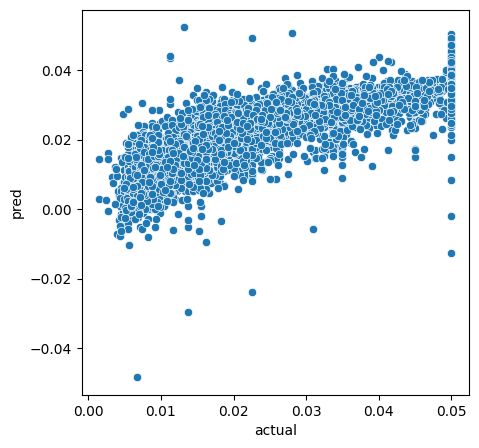

In [36]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='actual', y='pred', data=result)

### (4) Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred) # MSE is the mean squared of the difference between actual values and predicted values. If a model is well trained, MSE must be low.
print("MSE (Mean Squared Error):", MSE)

MSE (Mean Squared Error): 5.01925564151914e-05


In [38]:
RMSE = MSE ** 0.5
print("RMSE (Root Mean Squared Error):", RMSE)

RMSE (Root Mean Squared Error): 0.007084670522698384


In [39]:
R_squared=lr.score(X_train, y_train)
print("R_squared:", R_squared)

R_squared: 0.609508964165206


In [40]:
lr.coef_

array([ 0.02173728, -0.00785327,  0.02393251, -0.00042109, -0.01177553,
       -0.00460585, -0.00463134])

In [41]:
X_train.columns

Index(['MedInc_log', 'AveRooms_log', 'AveBedrms_log', 'Population_log',
       'AveOccup_log', 'Latitude', 'Longitude'],
      dtype='object')

In [42]:
coefficients = pd.Series(lr.coef_, index=X_train.columns)
coefficients.name = "coefficients"
print(coefficients)

MedInc_log        0.021737
AveRooms_log     -0.007853
AveBedrms_log     0.023933
Population_log   -0.000421
AveOccup_log     -0.011776
Latitude         -0.004606
Longitude        -0.004631
Name: coefficients, dtype: float64


In [43]:
lr.intercept_

-0.38622712281801774

In [44]:
import statsmodels.api as sm
# Add a constant to the features
X_train_sm = sm.add_constant(X_train)
# Create and fit the OLS (Ordinary Least Squares) model.
model = sm.OLS(y_train, X_train_sm).fit()
# Print the summary OLS model
print(model.summary())
# According to the p-value of each coefficient, Population variable is not statistically significance at 0.05 significance level.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3147.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:47:06   Log-Likelihood:                 49847.
No. Observations:               14121   AIC:                        -9.968e+04
Df Residuals:                   14113   BIC:                        -9.962e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3862      0.008    -47.

### (5) Assumption Checking

Text(0.5, 1.0, 'Linearity Assumption')

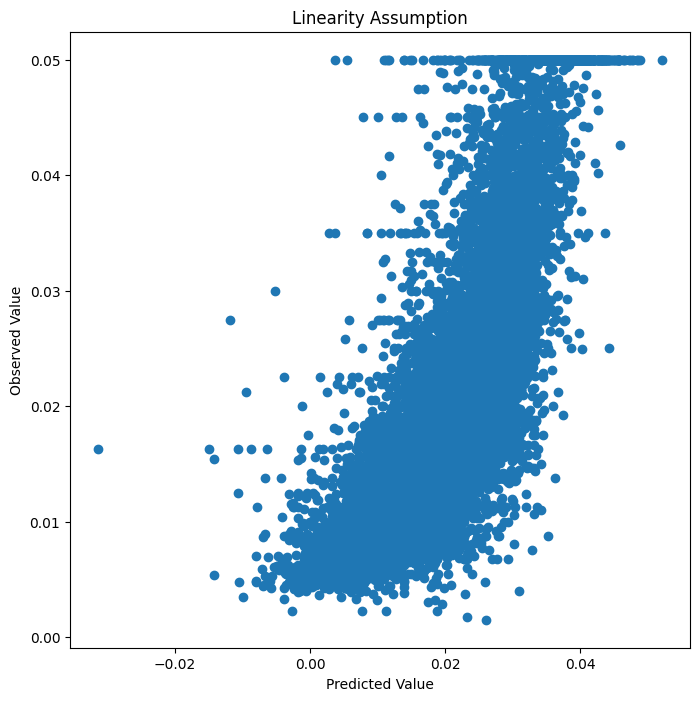

In [45]:
# Check Linearity Assumption for the fitted linear regression
plt.figure(figsize=(8,8))
plt.scatter(model.fittedvalues, y_train)
plt.xlabel("Predicted Value")
plt.ylabel("Observed Value")
plt.title("Linearity Assumption")
# The scatter plot between predicted values and observed values from trained X and Y dataset seems to be linear but it seems that some features are capped because there are some horizontal lines

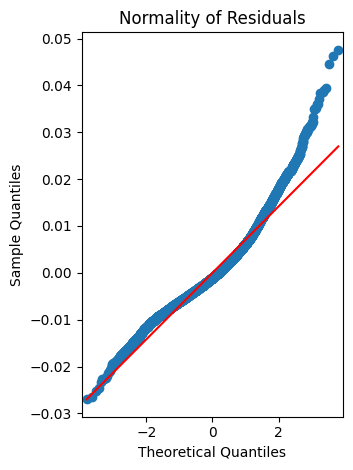

In [46]:
# Check the normality using a Q-Q plot.
plt.subplot(1,2,2)
sm.qqplot(model.resid, line='s', ax=plt.gca())
plt.title("Normality of Residuals")
plt.tight_layout()
plt.show()
# There seems to be a curve in Q-Q plot but it follows the red line indicating the normality assumption.

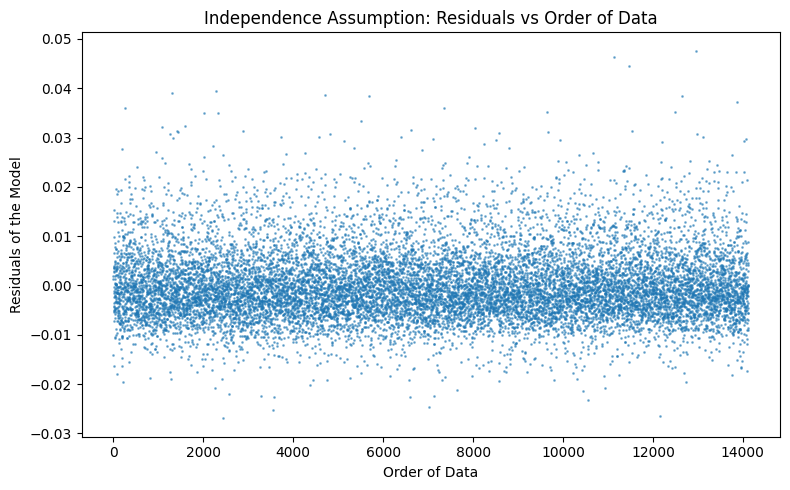

In [47]:
# Check the independence of residuals
# Plot residuals
plt.figure(figsize=(8,5))
plt.scatter(range(len(model.resid)), model.resid, s=1, alpha=0.5)
plt.title("Independence Assumption: Residuals vs Order of Data")
plt.xlabel("Order of Data")
plt.ylabel("Residuals of the Model")
plt.tight_layout()
plt.show()
# Based on the scatter plot for residuals, there doesn't appear to be any patterns between residuals meeting independence assumption.

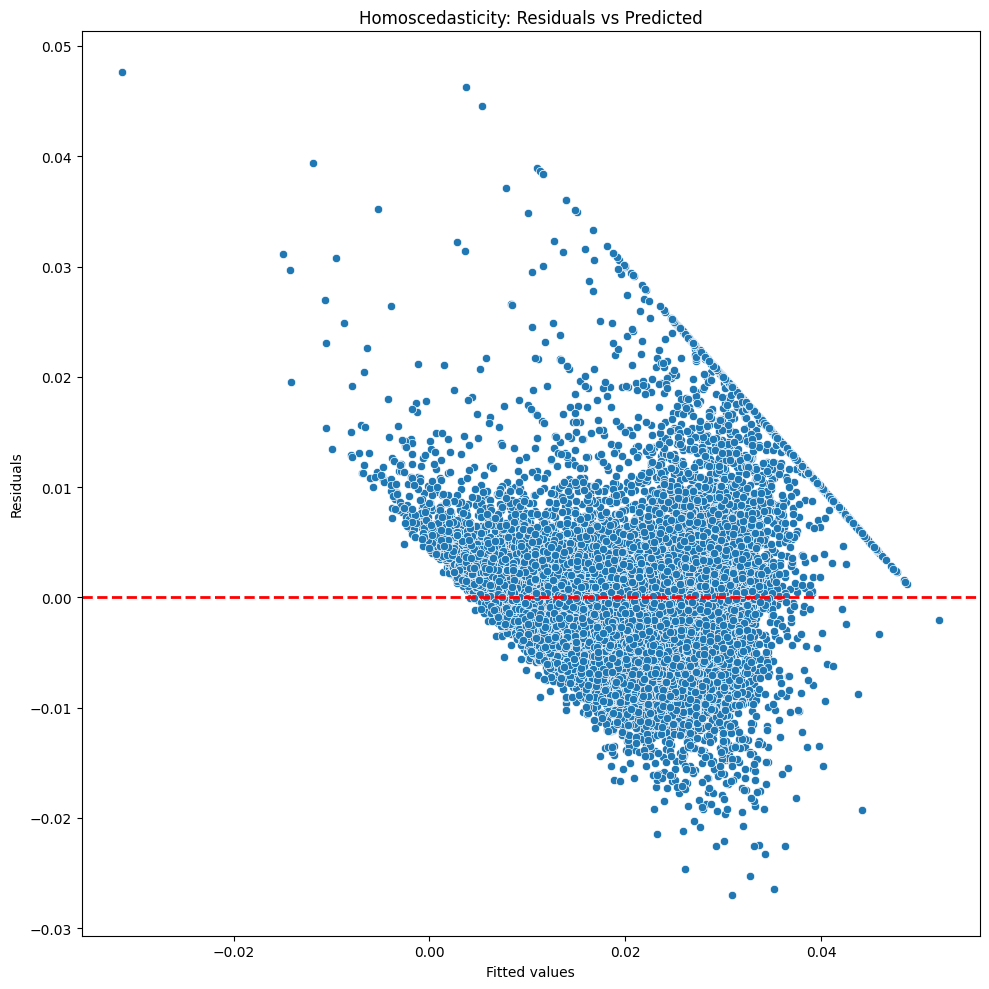

In [48]:
# Homoscedasticity
plt.figure(figsize=(10,10))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(0, linestyle = '--', color='r', linewidth=2)
plt.title("Homoscedasticity: Residuals vs Predicted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()
# There seems to be heteroskedasticity between residuals and fitted values.
# Log_transformation or using a weight is needed to remedy this heteroskedasticity

In [49]:
# In order to reduce heteroskedasticity, log transformation of y
import numpy as np
model = sm.OLS(np.log(y), X).fit()

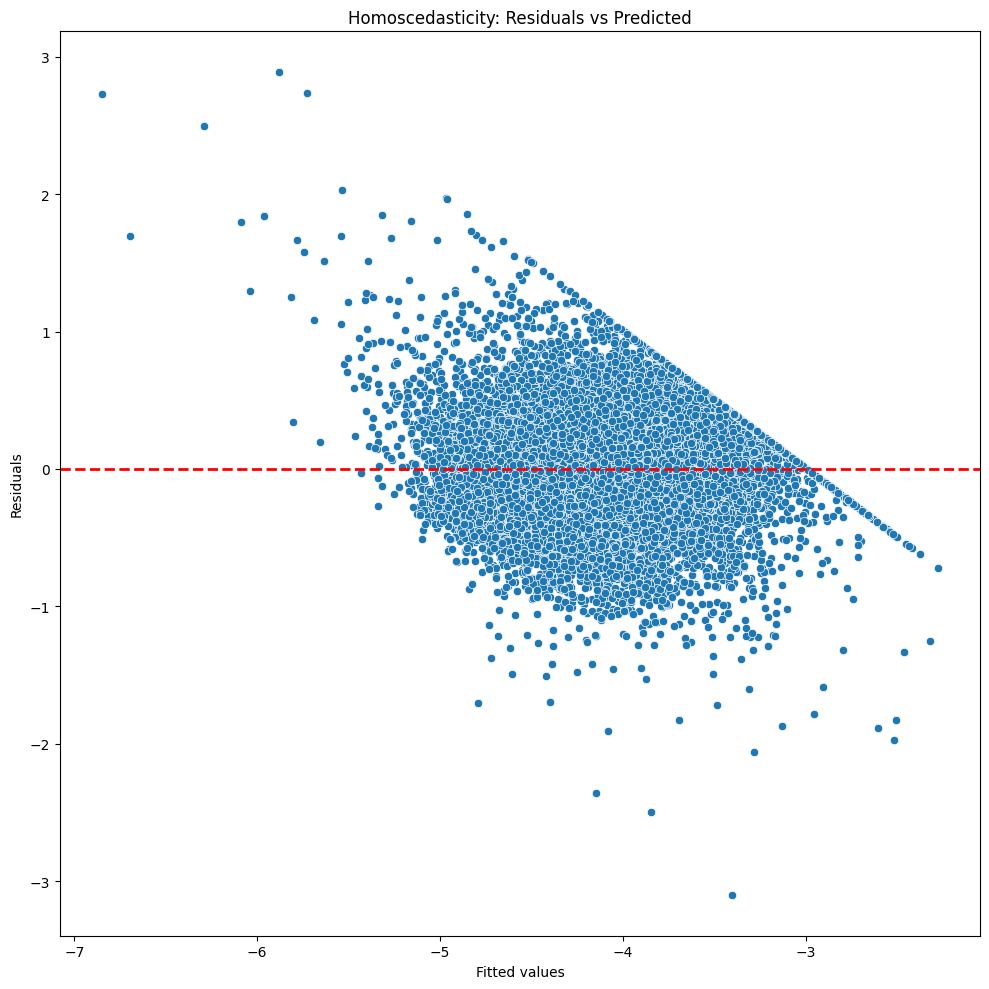

In [50]:
# Homoscedasticity with log transformed y
# After applying this remedy, the heteroskedasticity seems to be mitigated visually.
plt.figure(figsize=(10,10))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(0, linestyle = '--', color='r', linewidth=2)
plt.title("Homoscedasticity: Residuals vs Predicted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [51]:
# Define the independent variables (X) and apply log transformation to y (final original model with log transformation )
X = df[['MedInc_log', 'AveRooms_log', 'AveBedrms_log', 'Population_log', 'AveOccup_log', 'Latitude', 'Longitude']]
y = np.log(df['MEDV'])  # Apply log transformation to y after remedying the heteroskedasticity

# Add a constant to the independent variables for the OLS model
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels OLS
model = sm.OLS(y, X_with_const).fit()

# Predict the values using the model
y_pred = model.predict(X_with_const)

# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Extract R2 and Adjusted R2 from the model
r2 = model.rsquared
adjusted_r2 = model.rsquared_adj

# Print the results
print(f"Original MSE: {mse}")
print(f"Original RMSE: {rmse}")
print(f"Original R2: {r2}")
print(f"Original Adjusted R2: {adjusted_r2}")

Original MSE: 0.10278250793852772
Original RMSE: 0.3205971115567446
Original R2: 0.6781083495882084
Original Adjusted R2: 0.6779966149084067


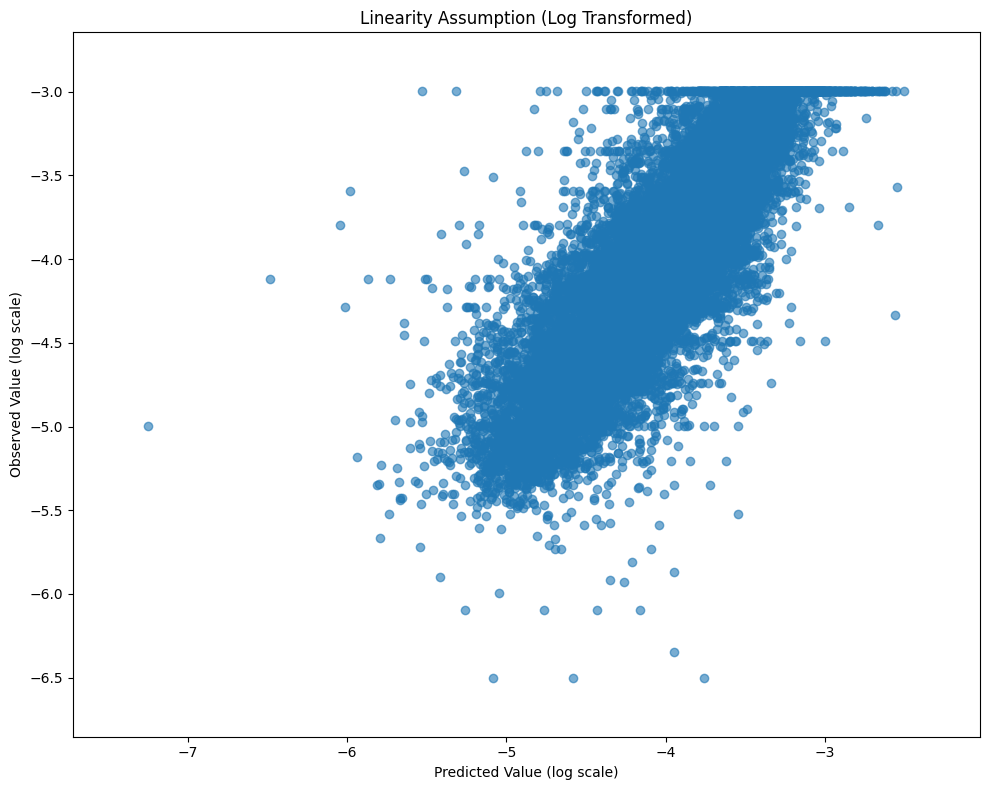

In [52]:
# Scatter plot of predicted values vs observed values
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, y, alpha=0.6)  # Predicted values (y_pred) vs Observed values (y)
plt.xlabel("Predicted Value (log scale)")
plt.ylabel("Observed Value (log scale)")
plt.title("Linearity Assumption (Log Transformed)")

# Adjust axis limits with more padding
x_padding = (max(y_pred) - min(y_pred)) * 0.1  # 10% padding for x-axis
y_padding = (max(y) - min(y)) * 0.1            # 10% padding for y-axis

plt.xlim([min(y_pred) - x_padding, max(y_pred) + x_padding])  # Extend x-axis range
plt.ylim([min(y) - y_padding, max(y) + y_padding])            # Extend y-axis range

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Optional reference line

plt.tight_layout()
plt.show()

# After the log tranformation of y, the linearity is also improved.

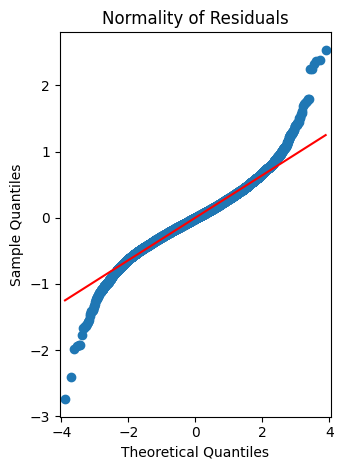

In [53]:
# Check the normality using a Q-Q plot.
plt.subplot(1,2,2)
sm.qqplot(model.resid, line='s', ax=plt.gca())
plt.title("Normality of Residuals")
plt.tight_layout()
plt.show()
# The second Q-Q plot to check the normality of residuals seems to more stick to the red line indicating a compliance with the normality assumption even if this assumption is still violated at both ends of tails after finalizing the log transformation of y
# The reason for slight deviations evident at both ends of tails is that there are outliers in several variables but were not removed due to justified reasons for outliers associated with those variables

### (6) Improving the Model

In [54]:
# Model development including interactions terms and using stepwise regression to finalize the model
# Create the combinations of features
from itertools import combinations

def create_interaction_terms(df, features):
  interaction_terms = pd.DataFrame()
  for combo in combinations(features, 2):
    term_name = f"{combo[0].strip()} * {combo[1].strip()}"
    interaction_terms[term_name] = df[combo[0]] * df[combo[1]]
  return interaction_terms

# Remove trailing spaces from column names in X
X.columns = X.columns.str.strip()

# Get the column names
features = X.columns
interaction_terms = create_interaction_terms(X, features)
X_interaction_terms = pd.concat([X, interaction_terms], axis=1)



In [55]:

# Train-test split for the model with interaction terms
X_train, X_test, y_train, y_test = train_test_split(
    X_interaction_terms, y, test_size = 0.3, random_state = 100 # Using the log transformation of y from the previous model
)

# Convert NumPy arrays back to DataFrames and maintain column names
X_train = pd.DataFrame(X_train, columns=X_interaction_terms.columns)
X_test = pd.DataFrame(X_test, columns=X_interaction_terms.columns)


In [56]:
import pandas as pd
import statsmodels.api as sm

def stepwise_regression_simple(X, y, significance_level_in=0.05, significance_level_out=0.05):
    included = []  # Initially empty list of included variables

    while True:
        changed = False

        # Forward Selection
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            X_with_const = sm.add_constant(X[included + [new_col]])
            model = sm.OLS(y, X_with_const).fit()
            new_pvals[new_col] = model.pvalues[new_col]

        if not new_pvals.empty:
            best_pval = new_pvals.min()
            if best_pval < significance_level_in:
                best_feature = new_pvals.idxmin()
                included.append(best_feature)
                changed = True
                print(f"Adding {best_feature} (p-value: {best_pval})")

        # Backward Elimination
        if included:
            X_with_const = sm.add_constant(X[included])
            model = sm.OLS(y, X_with_const).fit()
            pvals = model.pvalues.iloc[1:]  # Skip the intercept
            worst_pval = pvals.max()
            if worst_pval > significance_level_out:
                worst_feature = pvals.idxmax()
                included.remove(worst_feature)
                changed = True
                print(f"Removing {worst_feature} (p-value: {worst_pval})")

        if not changed:
            break

    return included

# Example usage
selected_features = stepwise_regression_simple(X_train, y_train)
print("Final selected features after stepwise regression:")
print(selected_features)


Adding MedInc_log * AveRooms_log (p-value: 0.0)
Adding MedInc_log (p-value: 0.0)
Adding AveRooms_log * AveOccup_log (p-value: 0.0)
Adding AveRooms_log * Latitude (p-value: 1.065994603642217e-197)
Adding Longitude (p-value: 0.0)
Adding Latitude * Longitude (p-value: 0.0)
Adding AveBedrms_log * Latitude (p-value: 8.697845106254207e-64)
Adding AveRooms_log * Longitude (p-value: 1.697426417169094e-21)
Adding AveRooms_log (p-value: 1.6263243400368137e-24)
Adding Latitude (p-value: 1.1504702286465167e-09)
Removing Latitude * Longitude (p-value: 0.40779858611325714)
Adding MedInc_log * AveOccup_log (p-value: 3.967277078588517e-09)
Removing MedInc_log (p-value: 0.5118088185860139)
Adding AveOccup_log * Latitude (p-value: 0.00014939938466006252)
Removing AveRooms_log * AveOccup_log (p-value: 0.07621211378713945)
Adding MedInc_log * Population_log (p-value: 0.004171254592404807)
Adding AveRooms_log * Population_log (p-value: 9.493910438976021e-17)
Removing AveOccup_log * Latitude (p-value: 0.896

In [57]:
# Final selected features after stepwise regression
selected_features = [
    'MedInc_log * AveOccup_log', 'AveBedrms_log', 'MedInc_log * AveRooms_log',
    'AveRooms_log * Latitude', 'Longitude', 'Latitude',
    'AveRooms_log * Longitude', 'AveRooms_log', 'MedInc_log * Population_log',
    'AveRooms_log * Population_log', 'AveBedrms_log * Population_log',
    'MedInc_log * Latitude', 'AveBedrms_log * Longitude',
    'AveOccup_log * Latitude', 'AveRooms_log * AveOccup_log',
    'Population_log * AveOccup_log', 'Population_log',
    'Population_log * Latitude', 'AveRooms_log * AveBedrms_log'
]

# Extract individual variables and interaction terms
individual_variables = {'Longitude', 'Latitude', 'AveRooms_log', 'Population_log', 'AveBedrms_log'}
all_variables = set()

for feature in selected_features:
    if " * " in feature:  # It's an interaction term
        variables = feature.split(" * ")
        all_variables.update(variables)
    else:
        all_variables.add(feature)

# Find missing individual variables
missing_individual_variables = all_variables - individual_variables

# Print the result
print("Individual variables included in interaction terms but missing as standalone features:")
print(missing_individual_variables)


Individual variables included in interaction terms but missing as standalone features:
{'MedInc_log', 'AveOccup_log'}


In [58]:
# Add missing individual variables to the selected_features list
missing_individual_variables = {'MedInc_log', 'AveOccup_log'}
selected_features = selected_features + list(missing_individual_variables)

### (7) Model Evaluation

In [59]:
# Selected features after stepwise regression
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

# Linear regression using the finalized model
final_model = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()

# Evaluate model performance with selected features
y_pred = final_model.predict(sm.add_constant(X_test_final))

# Use R_squared, MSE, RMSE to evaluate the final model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = final_model.rsquared_adj

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")


Mean Squared Error: 0.09958276069450187
R2 Score: 0.6940221471664774
Adjusted R2 Score: 0.6988075103464968


In [60]:
# Compare the original model with improved model
# Original model results
original_mse = 0.10278250793852772
original_rmse = 0.3205971115567446
original_r2 = 0.6781083495882084
original_adjusted_r2 = 0.6779966149084067


# Final model results
final_mse = 0.09958276069449787
final_rmse = 0.31555440907174655  # Calculated as sqrt(final_mse)
final_r2 = 0.6940221471664898
final_adjusted_r2 = 0.6988075103464968

pd.options.display.float_format = '{:.4f}'.format

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "R2", "Adjusted R2"],
    "Baseline Model": [original_mse, original_rmse, original_r2, original_adjusted_r2],
    "Final Model": [final_mse, final_rmse, final_r2, final_adjusted_r2]
})

# Display the comparison table
print(comparison_df)


        Metric  Baseline Model  Final Model
0          MSE          0.1028       0.0996
1         RMSE          0.3206       0.3156
2           R2          0.6781       0.6940
3  Adjusted R2          0.6780       0.6988
